In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def plt2l(ax, x, y, y1, y2, title='', label=['', '', ''], fontsize=12, 
          yrange=[55., 80.], xrange=[-6, 6], xlabel=True, ylabel='Cloud cover (%)', 
          legend=False, row='first'):
    # Plot the data
    ax.plot(x, y, label=label[0])
    ax.plot(x, y1, label=label[1])
    ax.plot(x, y2, label=label[2], color='black')
    
    # Set axis limits
    ax.set_xlim(xrange)
    ax.set_ylim(yrange)
    
    # Set labels and titles
    ax.set_ylabel(ylabel, fontsize=fontsize)
    if xlabel:
        ax.set_xlabel('Distance from ice edge \n ($\degree$ latitude)', fontsize=fontsize)
    
    ax.set_title(title, fontsize=fontsize)
    
    # Add vertical line at x=0
    ax.axvline(x=0., color='black', lw=0.5, linestyle='--')
    
    # Adjust ylabel and yrange for the second row of plots
    if row == 'second':  # If it's the second row, modify y-axis settings
        ax.set_ylim([0., 100.])
        ax.set_ylabel('Sea Ice Concentration (%)', fontsize=fontsize)
    
    # Add legend
    if legend:
        ax.legend(loc='best', fontsize=0.8 * fontsize)

(0.0, 100.0)

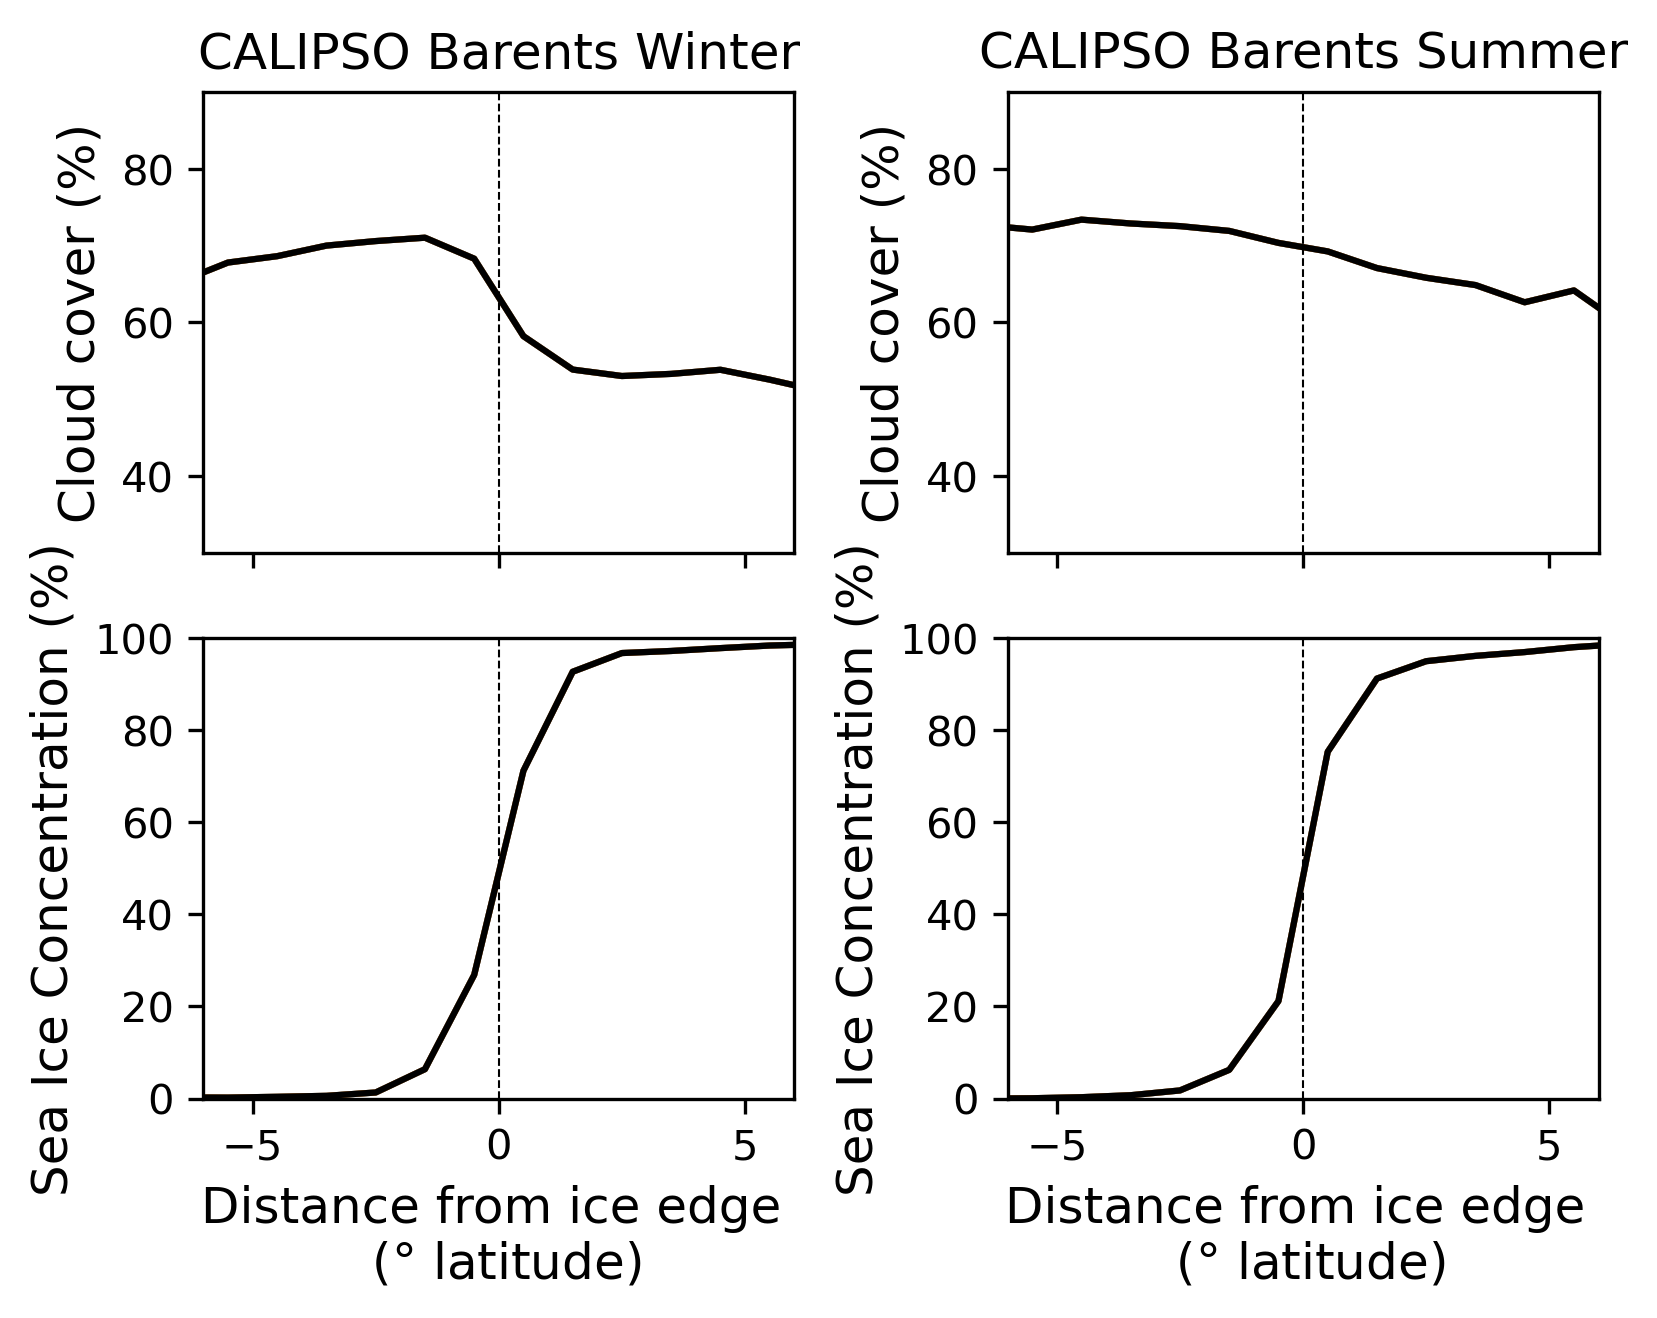

In [3]:
f = xr.open_dataset('/home/rcostell/Observation_Files/Binned/New_Observed_2D_CF.nc')
f = f.groupby("time.season").mean()
myfontsize = 10
fig, axs = plt.subplots(ncols = 2,
                        nrows = 2,
                        sharex = True, sharey = False,
                        figsize=(14/2.54, 10/2.54), dpi = 300)

plt.tight_layout()

x = f.distance.values
y = f.cllcalipso.isel(season = 0).values*100
y1 = f.cllcalipso.isel(season = 0).values*100
y2 = f.cllcalipso.isel(season = 0).values*100


plt2l(axs[0,0], x, y, y1, y2, title = 'CALIPSO Barents Winter', label = ['On-ice', 'Off-ice', 'All'], 
        xlabel = False,legend = False)
axs[0,0].set_ylim(30, 90)

x = f.distance.values
y = f.cllcalipso.isel(season = 1).values*100
y1 = f.cllcalipso.isel(season = 1).values*100
y2 = f.cllcalipso.isel(season = 1).values*100

plt2l(axs[0,1], x, y, y1, y2, title = 'CALIPSO Barents Summer', label = ['On-ice', 'Off-ice', 'All'], 
        xlabel = False,legend = False)
axs[0,1].set_ylim(30, 90)

x = f.distance.values
y = f.seaice_conc.isel(season = 0).values*100
y1 = f.seaice_conc.isel(season = 0).values*100
y2 = f.seaice_conc.isel(season = 0).values*100

plt2l(axs[1,0], x, y, y1, y2, title='', label=['On-ice', 'Off-ice', 'All'], 
      xlabel=True, ylabel='Sea Ice Concentration (%)', legend=False)
axs[1,0].set_ylim(0, 100)

x = f.distance.values
y = f.seaice_conc.isel(season = 1).values*100
y1 = f.seaice_conc.isel(season = 1).values*100
y2 = f.seaice_conc.isel(season = 1).values*100

plt2l(axs[1,1], x, y, y1, y2, title='', label=['On-ice', 'Off-ice', 'All'], 
      xlabel=True, ylabel='Sea Ice Concentration (%)', legend=False)
axs[1,1].set_ylim(0, 100)

#plt.savefig('/home/rcostell/Projects/CMIP6_Intercomparison/Observations/Output_Figures/CALIPSO_Barents_2D_CF.png')